## Chapter 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 4.2

In [99]:
dt = 0.001

# Ensemble size
M = 1000
x0 = 0
y0 = 0
z0 = 0

Nout = 50
STEPS = 2000

x = np.zeros((M,STEPS+1))
y = np.zeros((M,STEPS+1))
z = np.zeros((M,STEPS+1))
t = np.zeros((STEPS+1))

x[:,0] = x0 + 0.1 * np.random.randn(M)
y[:,0] = y0 + 0.1 * np.random.randn(M)
z[:,0] = z0 + 0.1 * np.random.randn(M)
t[0] = 0.

for j in range(STEPS):
    xh = x[:,j]
    yh = y[:,j]
    zh = z[:,j]
    
    for i in range(Nout):
        xo = xh
        yo = yh
        zo = zh
        
        xh = xo + dt * 10. * (yo - xo)
        yh = yo + dt * (xo * (28. - zo) - yo)
        zh = zo + dt * (xo * yo - 8./3 * zo)
        
    x[:,j+1] = xh
    y[:,j+1] = yh
    z[:,j+1] = zh
    
    t[j+1] = dt * Nout * (j + 1)
    
x_model = x
y_model = y
z_model = z
time_model = t

<IPython.core.display.Javascript object>


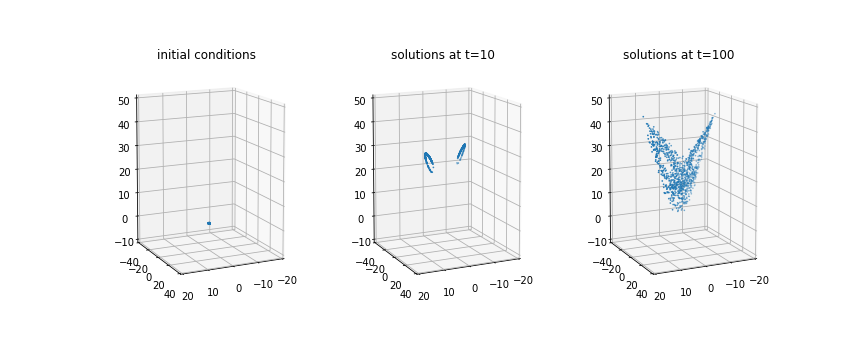

In [105]:
from mpl_toolkits.mplot3d import Axes3D
def plt3d(i, n, title):
    ax = fig1.add_subplot(1, 3, i, projection='3d')
    ax.set_xlim([-20.,20.])
    ax.set_ylim([-40.,40.])
    ax.set_zlim([-10.,50.])
    ax.view_init(elev=10, azim=65)
    ax.set_title(title)
    return ax.scatter(x[:,n],y[:,n],z[:,n],s=0.5)
    
fig1 = plt.figure(figsize=(12,5))
plt3d(1,0,'initial conditions')
plt3d(2,200,'solutions at t=10')
plt3d(3,2000,'solutions at t=100')
plt.show()